In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.datasets import load_diabetes, load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
def correlation_matrix(self) -> None:    # Строит стандартную корреляционную матрицу
    plt.subplots(figsize=(10, 8))
    sns.heatmap(self.corr(), cmap='RdBu', annot=True, fmt=".2f")
    plt.xticks(range(len(self.corr().columns)), self.corr().columns);
    plt.yticks(range(len(self.corr().columns)), self.corr().columns)
    plt.title("Корреляционная матрица", fontsize=16)
    plt.show()

def compare_plot(self, column_x: int, column_y: int) -> None:   # Строит график зависимости по 2 параметрам. Ввод по индексу сравниваемых колонок
    plt.figure(figsize=(8, 6))
    title_x = self.columns[column_x]
    title_y = self.columns[column_y]
    plt.title("{} vs. \n{}".format(title_x, title_y), fontsize=13)
    sns.regplot(x=self[title_x], y=self[title_y])
    plt.grid(True)
    plt.xlabel(title_x, fontsize=11)
    plt.ylabel(title_y, fontsize=11)
    plt.show()

def compare_plots_to_parametr(self, column_y: int) -> None:    # Строит графики зависимости по всем параметрам с привязкой к column_y (индекс)
    for i in self.columns[:-1]:
      plt.figure(figsize=(8, 6))
      title_y = self.columns[column_y]
      plt.title("{} vs. \n{}".format(i, title_y), fontsize=13)
      sns.regplot(x=self[i], y=self[title_y])
      plt.grid(True)
      plt.xlabel(i, fontsize=11)
      plt.ylabel(title_y, fontsize=11)
      plt.show()

def top_correlations(self, top_n: int) -> None:        # Выводит top_n корреляционных пар
    correlation_matrix = self.corr()
    correlation_pairs = correlation_matrix.unstack()
    correlation_pairs = correlation_pairs.reset_index()
    correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]
    correlation_pairs['Ordered Pair'] = correlation_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis='columns')
    correlation_pairs = correlation_pairs.drop_duplicates(subset=['Ordered Pair'])
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(top_n):
      row = top_correlations.iloc[i]
      print(f"{i + 1}. {row['Variable 1']} AND {row['Variable 2']}: {row['Correlation']:.2f}")

def top_correlations_to_parametr(self, top_n: int, num_column: int) -> None:  # Выводит top_n корреляционных пар с привязкой к to_column
    correlation_matrix = self.corr()
    to_column = self.columns[num_column]
    correlation_pairs = correlation_matrix[[to_column]].reset_index()
    correlation_pairs.columns = ['Variable', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable'] != to_column]
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(min(top_n, len(top_correlations))):
        row = top_correlations.iloc[i]
        print(f"{i + 1}. {row['Variable']} AND {to_column}: {row['Correlation']:.2f}")

def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))])

def mserror_mat(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / len(y_pred)

def gr_mserror_mat(X, w, y):
    y_pred = X @ w
    return 2/len(X)*(y - y_pred) @ (-X)

def linear_regression(X, y, epochs, learning_rate=0.05):
    X = np.array(X)
    n = len(X)
    w0 = 0
    w1 = 0

    for i in range(epochs):
        y_pred = w0 + w1 * X
        dw0 = (-2 / n) * sum(y - y_pred)
        dw1 = (-2 / n) * sum(X * (y - y_pred))

        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1

        print(f'{i}. {mserror(X, w1, w0, y)}')

    return w0, w1

def counter(lst_pred, lst_true):
    if len(lst_pred) != len(lst_true):
        raise Exception('Разные размеры списков. Проверьте значения')
    else:
        for i in range(len(lst_pred)):
            if lst_pred[i] != bool(lst_pred[i]):
                raise Exception(f'Ошибка {[i]} элемента 1 списка. Принимаются только значения 1 и 0 (нынешнее: {lst_pred[i]})')
            else:
                if lst_true[i] != bool(lst_true[i]):
                    raise Exception(f'Ошибка {[i]} элемента 2 списка. Принимаются только значения 1 и 0 (нынешнее: {lst_true[i]})')
    pairs = []
    for i in range(len(lst_pred)):
        pairs.append((lst_pred[i], lst_true[i]))
    pair_counts = Counter(pairs)
    return pair_counts

def precision(lst_pred, lst_true):
    counters = counter(lst_pred, lst_true)
    TP = counters.get((1, 1), 0)
    FP = counters.get((0, 1), 0)
    FN = counters.get((1, 0), 0)
    precision = TP / (TP + FP)
    print(round(precision, 2))

def recall(lst_pred, lst_true):
    counters = counter(lst_pred, lst_true)
    TP = counters.get((1, 1), 0)
    FP = counters.get((0, 1), 0)
    FN = counters.get((1, 0), 0)
    recall = TP / (TP + FN)
    print(round(recall, 2))

def f1(lst_pred, lst_true):
    counters = counter(lst_pred, lst_true)
    TP = counters.get((1, 1), 0)
    FP = counters.get((0, 1), 0)
    FN = counters.get((1, 0), 0)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(round(f1, 2))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, beta):
    m = len(y)
    predictions = sigmoid(X @ beta)
    cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    return cost

def gradient_descent(X, y, beta, learning_rate=0.001, iterations=100000):
    m = len(y)
    for _ in range(iterations):
        predictions = sigmoid(X @ beta)
        gradient = (1/m) * X.T @ (predictions - y)
        beta -= learning_rate * gradient
    return beta

In [3]:
dataset = load_diabetes(as_frame=True)
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['TEMP'] = dataset.target
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TEMP
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


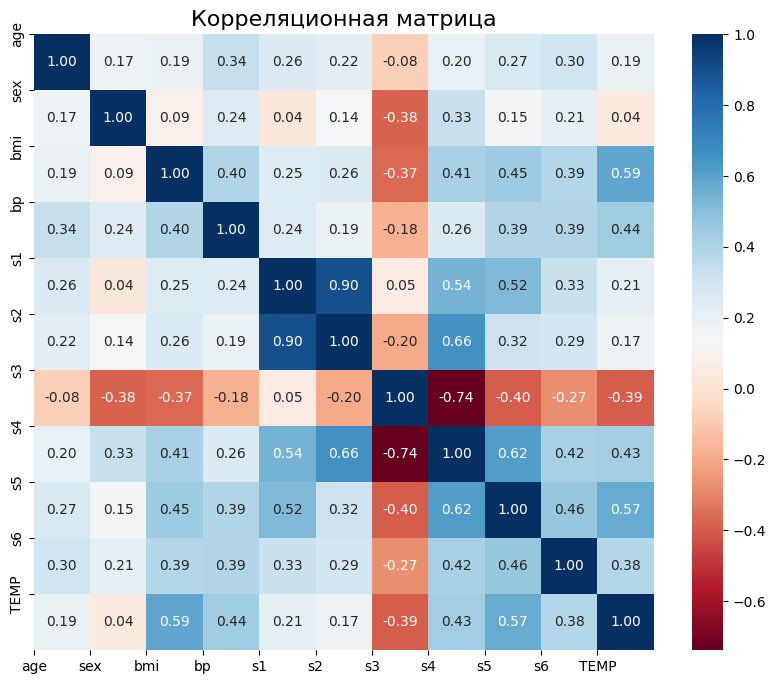

In [4]:
correlation_matrix(df)

In [ ]:
top_correlations_to_parametr(df, 10, 4)

1. s2 AND s1: 0.90
2. s4 AND s1: 0.54
3. s5 AND s1: 0.52
4. s6 AND s1: 0.33
5. age AND s1: 0.26
6. bmi AND s1: 0.25
7. bp AND s1: 0.24
8. TEMP AND s1: 0.21
9. s3 AND s1: 0.05
10. sex AND s1: 0.04


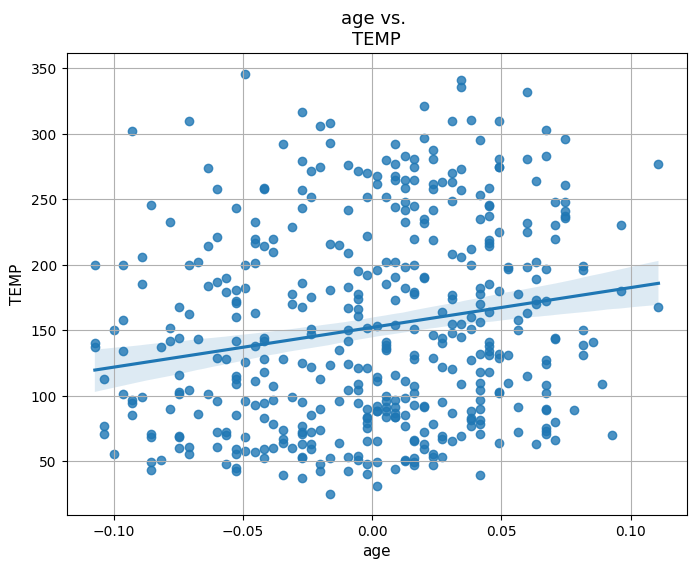

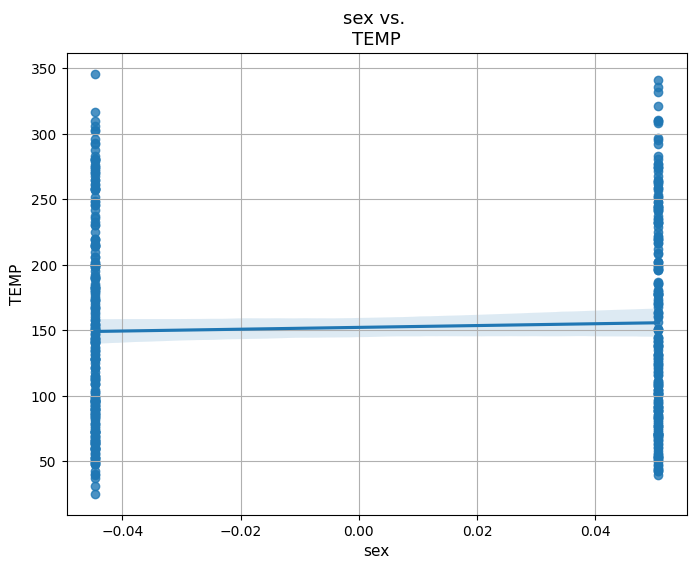

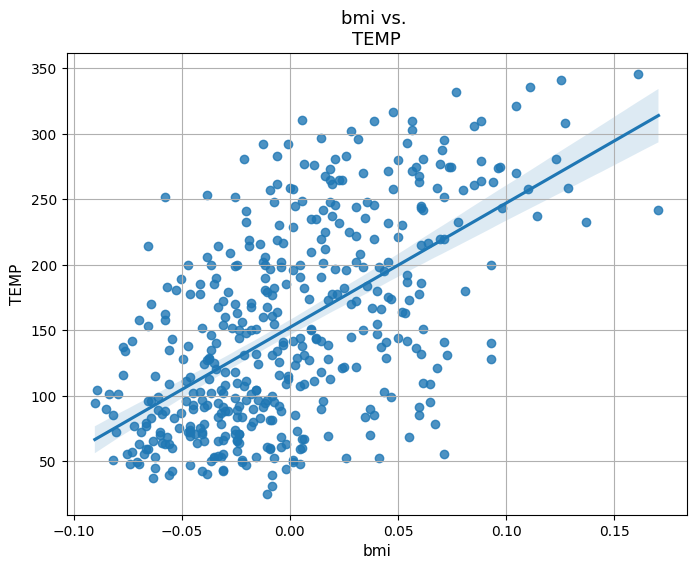

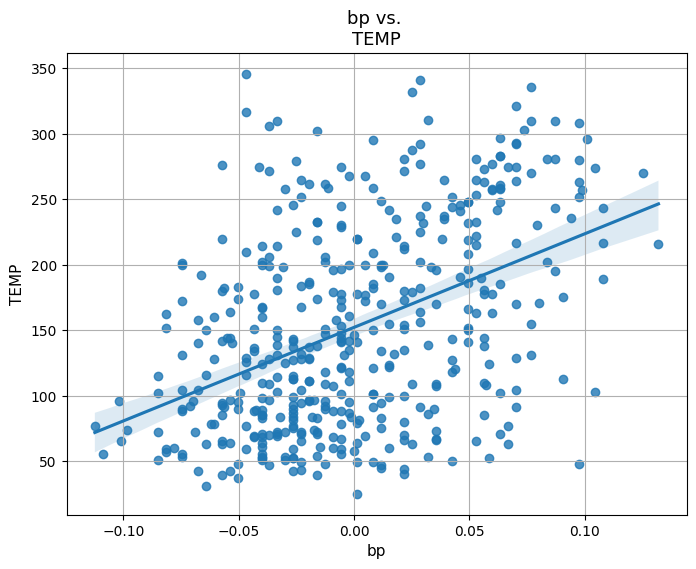

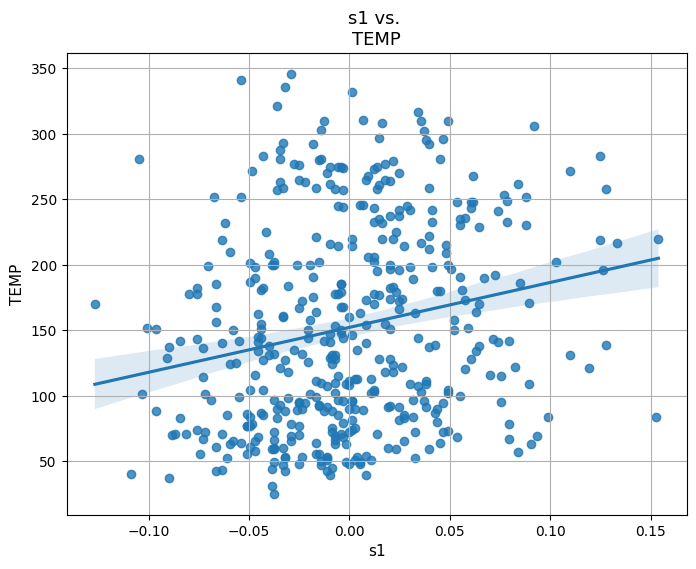

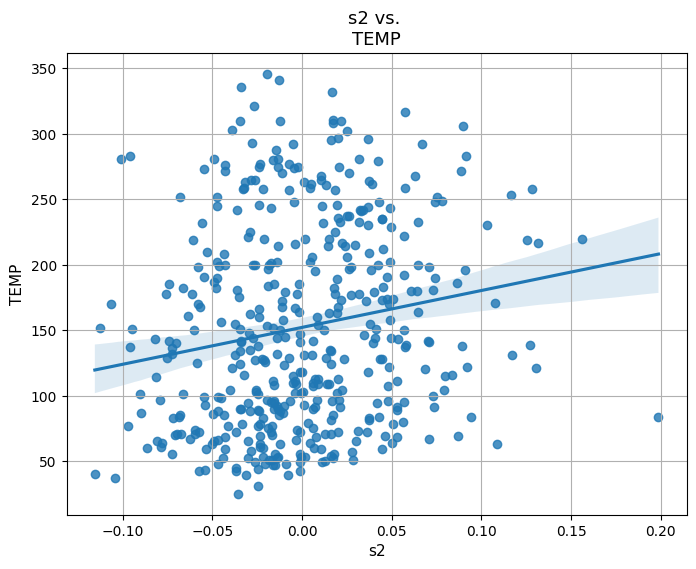

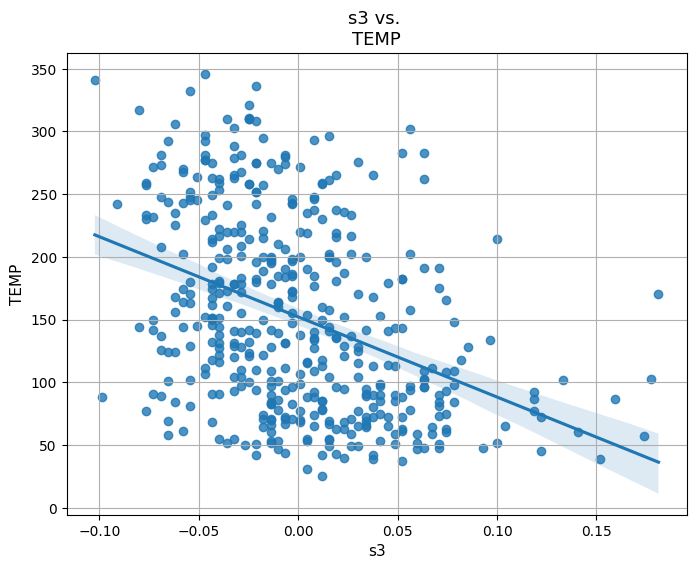

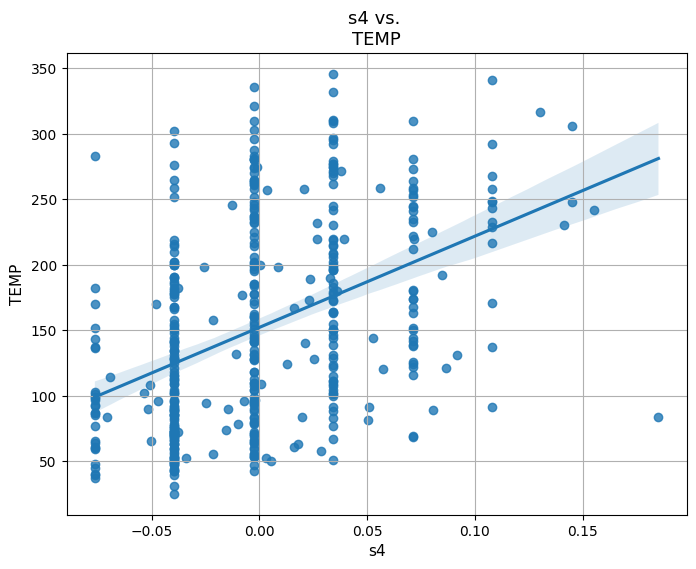

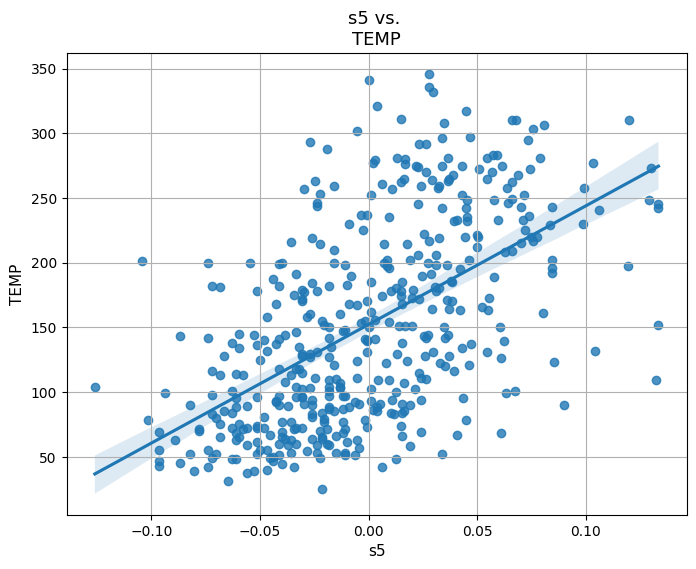

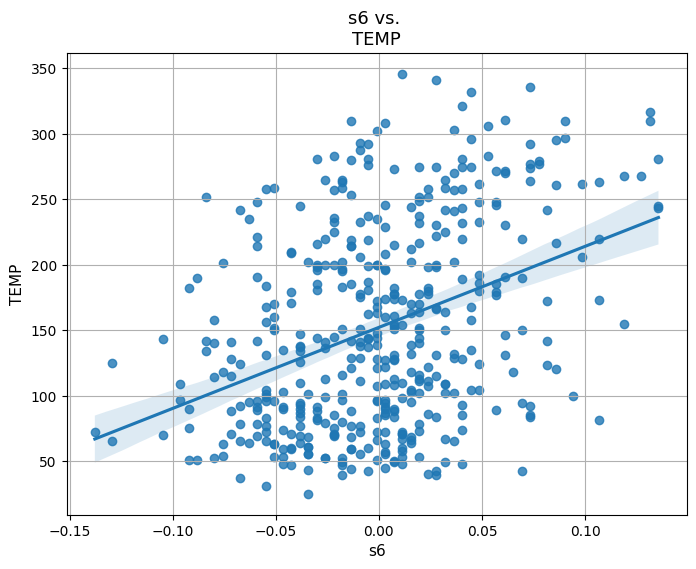

In [ ]:
compare_plots_to_parametr(df, 10)

In [18]:
X, y = load_diabetes(return_X_y= True)
X_age = df.iloc[:, 0].values
X_sex = df.iloc[:, 1].values
X_bmi = df.iloc[:, 2].values
X_bp = df.iloc[:, 3].values
X_s1 = df.iloc[:, 4].values
X_s2 = df.iloc[:, 5].values
X_s3 = df.iloc[:, 6].values
X_s4 = df.iloc[:, 7].values
X_s5 = df.iloc[:, 8].values
X_s6 = df.iloc[:, 9].values
X_lite = df.iloc[:, [0, 1, 2, 3, 4, 6, 8, 9]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=10)
X_lite_train, X_lite_test, y_train, y_test = train_test_split(X_lite, y, train_size=0.75, random_state=10)

In [19]:
X_age = X_age.reshape(-1, 1)
X_sex = X_sex.reshape(-1, 1)
X_bmi = X_bmi.reshape(-1, 1)
X_bp = X_bp.reshape(-1, 1)
X_s1 = X_s1.reshape(-1, 1)
X_s2 = X_s2.reshape(-1, 1)
X_s3 = X_s3.reshape(-1, 1)
X_s4 = X_s4.reshape(-1, 1)
X_s5 = X_s5.reshape(-1, 1)
X_s6 = X_s6.reshape(-1, 1)

In [7]:
model = LinearRegression()
model.fit(X_age, y)
model_a = model.coef_[0]
model_b = model.intercept_
print(model_a, model_b)

304.18307452830607 152.13348416289594


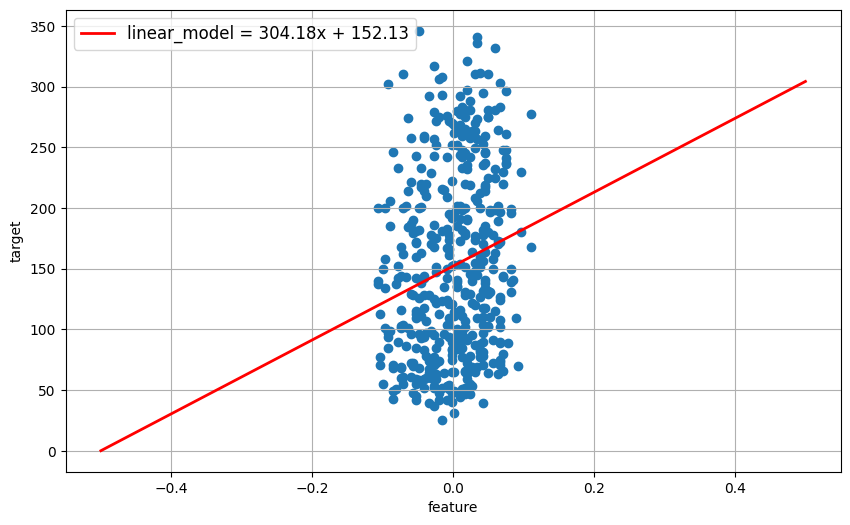

In [8]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-0.5, 0.51)
model_y_sk = model_a * x + model_b

plt.plot(x, model_y_sk, linewidth=2, c='r', label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X_age, y)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 12})
plt.show()

In [9]:
eps = 1e-6

w1 = 0
w0 = 0

learning_rate = 0.99

next_w1 = w1
next_w0 = w0

for i in range(10000):      # или while (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):

    cur_w1 = next_w1
    cur_w0 = next_w0

    next_w0 = cur_w0 - learning_rate * gr_mserror(X_age, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X_age, cur_w1, cur_w0, y)[1]

    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

    print(f"Итераций: {i}")
    print(f"Текущая точка {cur_w1, cur_w0}")
    print(f"MSE {mserror(X, cur_w1, cur_w0, y)}")
    print("----------------------------------------------------------")

Выходные данные были обрезаны до нескольких последних строк (5000).
Итераций: 1897
Текущая точка (304.1222239707432, 152.1334841628961)
MSE 5720.5470255830005
----------------------------------------------------------
Итераций: 1898
Текущая точка (304.12249655921374, 152.13348416289574)
MSE 5720.547025508114
----------------------------------------------------------
Итераций: 1899
Текущая точка (304.1227679265866, 152.1334841628961)
MSE 5720.547025433896
----------------------------------------------------------
Итераций: 1900
Текущая точка (304.1230380783319, 152.13348416289574)
MSE 5720.547025360343
----------------------------------------------------------
Итераций: 1901
Текущая точка (304.1233070198951, 152.1334841628961)
MSE 5720.547025287446
----------------------------------------------------------
Итераций: 1902
Текущая точка (304.12357475669745, 152.13348416289574)
MSE 5720.547025215201
----------------------------------------------------------
Итераций: 1903
Текущая точка (30

In [10]:
w0, w1 = linear_regression(X_age, y, 333)

print("w0 =", w0)
print("w1 =", w1)

0. 23550.330339366516
1. 19075.76757488688
2. 15451.37173565837
3. 12515.61110588328
4. 10137.644995765453
5. 8211.492446570017
6. 6651.308881721714
7. 5387.560194194589
8. 4363.923757297617
9. 3534.7782434110695
10. 2863.170377162967
11. 2319.1680055020024
12. 1878.5260844566224
13. 1521.6061284098641
14. 1232.50096401199
15. 998.3257808497118
16. 808.6438824882666
17. 655.0015448154961
18. 530.551251300552
19. 429.746513553447
20. 348.09467597829223
21. 281.95668754241666
22. 228.38491690935746
23. 184.99178269657958
24. 149.84334398422945
25. 121.37310862722588
26. 98.31221798805292
27. 79.63289657032286
28. 64.50264622196153
29. 52.24714343978882
30. 42.32018618622893
31. 34.27935081084544
32. 27.76627415678481
33. 22.49068206699569
34. 18.217452474266516
35. 14.756136504155876
36. 11.952470568366268
37. 9.681501160376671
38. 7.842015939905111
39. 6.352032911323139
40. 5.1451466581717415
41. 4.1675687931191066
42. 3.375730722426477
43. 2.7343418851654393
44. 2.2148169269840055
45. 

In [16]:
model = LinearRegression()
model.fit(X_lite_train, y_train)
model_a = model.coef_
model_b = model.intercept_
print(model_a, model_b)

[  10.92436452 -214.57509852  512.88935105  301.53849239 -142.41504765
 -266.5879763   513.47648831   65.64806424] 151.7060212143573


In [20]:
X_lite_train = np.column_stack([X_lite_train, np.ones((len(X_lite_train)))])

In [21]:
weights = np.zeros(X_lite_train.shape[1])
weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
eps = 0.0001
learning_rate = 0.99

next_weights = weights

for i in range(10000):
    cur_weights = next_weights

    next_weights = cur_weights - learning_rate * gr_mserror_mat(X_lite_train, cur_weights, y_train)

    print(f"Итерация: {i}")
    print(f"Текущая точка {next_weights}")
    print(f"MSE {mserror_mat(X_lite_train, cur_weights, y_train)}")
    print("--------------------------------------------------------")

    if np.linalg.norm(cur_weights - next_weights, ord=2) <= eps:
        break

Выходные данные были обрезаны до нескольких последних строк (5000).
Итерация: 5034
Текущая точка [  10.92475108 -214.62566609  512.8712462   301.58960737 -142.26026112
 -266.71367717  513.28878056   65.65285013  151.7060985 ]
MSE 2870.672435487155
--------------------------------------------------------
Итерация: 5035
Текущая точка [  10.92475067 -214.62559962  512.87126848  301.58954013 -142.26046825
 -266.71351061  513.2890322    65.65284317  151.70609839]
MSE 2870.672435341969
--------------------------------------------------------
Итерация: 5036
Текущая точка [  10.92475026 -214.62553324  512.87129074  301.58947298 -142.2606751
 -266.71334428  513.2892835    65.65283622  151.70609829]
MSE 2870.672435197171
--------------------------------------------------------
Итерация: 5037
Текущая точка [  10.92474985 -214.62546695  512.87131298  301.58940592 -142.26088167
 -266.71317816  513.28953445   65.65282928  151.70609818]
MSE 2870.6724350527593
-----------------------------------------

In [23]:
print('Веса при признаках')
print(f'True {model_a},\nTrained {next_weights[:-1]}')

print('\nВес свободный', end=' ')
print(f'True {model_b}, trained {next_weights[-1]}')

Веса при признаках
True [  10.92436452 -214.57509852  512.88935105  301.53849239 -142.41504765
 -266.5879763   513.47648831   65.64806424],
Trained [  10.92448172 -214.58860621  512.88423082  301.55213608 -142.37438269
 -266.62130497  513.42725503   65.6492307 ]

Вес свободный True 151.7060212143573, trained 151.70604123993775


In [27]:
dataset = load_iris()
df2 = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df2_10 = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df2['target'] = dataset.target
df2_10['target10'] = df2['target']
df2_10.loc[df2_10['target10'] == 2, 'target10'] = 1
df2_10.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target10
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


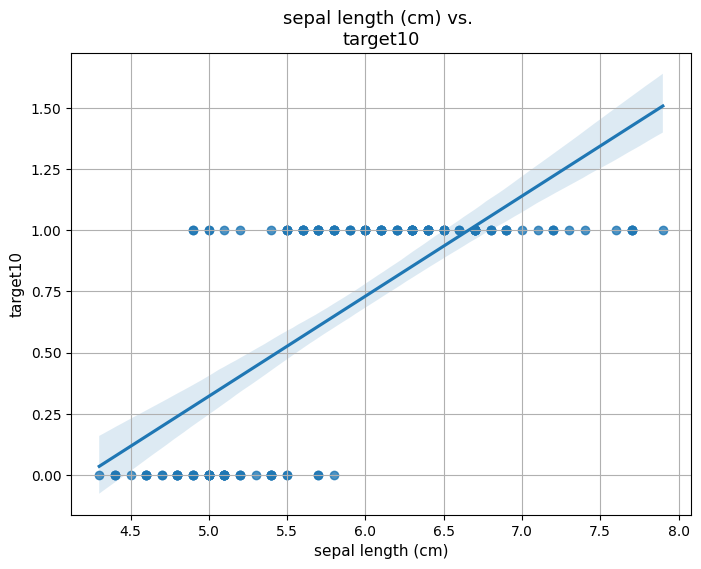

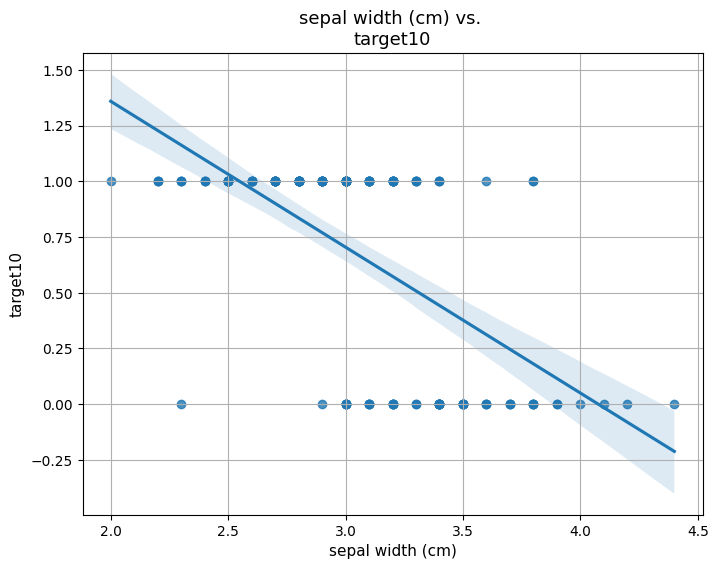

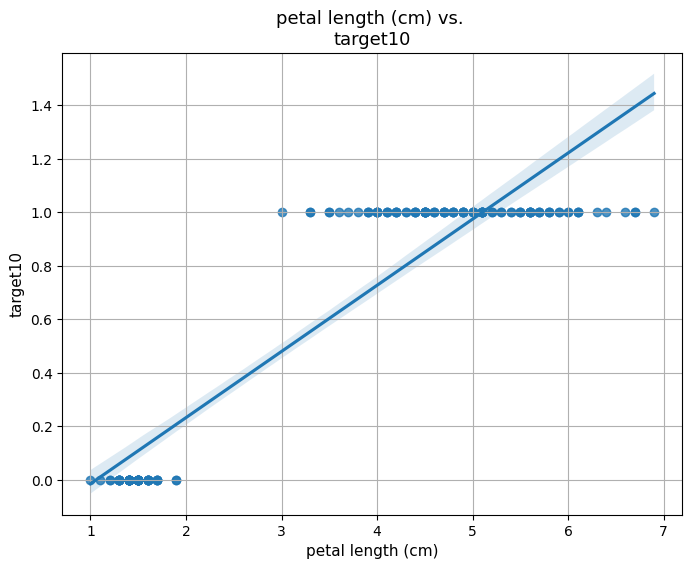

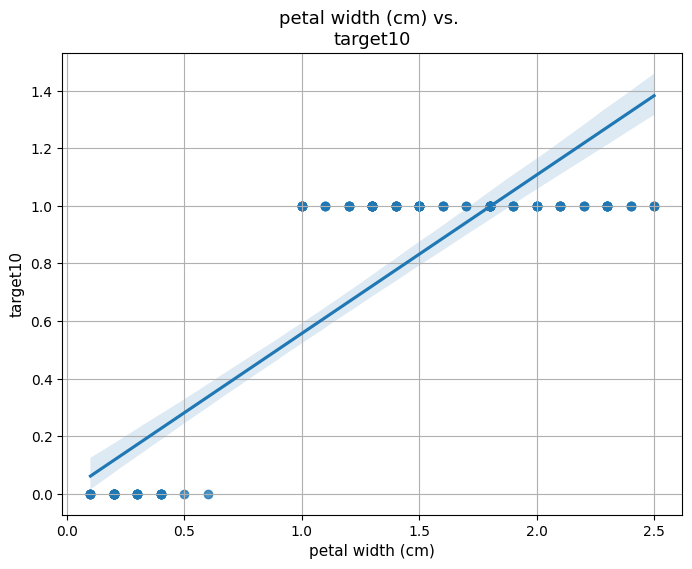

In [ ]:
compare_plots_to_parametr(df2_10, 4)

In [28]:
X, y = df2_10.iloc[:, [0, 1, 2, 3]].values, df2_10.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=10)

In [ ]:
model = LogisticRegression(max_iter=1000, fit_intercept=False)
model.fit(X_train, y_train)
model_a = model.coef_
model_b = model.intercept_
print(model_a, model_b)

[[-0.42020291 -1.40260315  2.13485511  0.96832411]] [0.]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
f1_score(y_pred, y_test)

1.0

In [ ]:
#X_train = np.column_stack([X_train, np.ones((len(X_train)))])

In [29]:
initial_beta = np.zeros(X_train.shape[1])

beta = gradient_descent(X_train, y_train, initial_beta)

print("Коэффициенты логистической регрессии:", beta)

Коэффициенты логистической регрессии: [-0.57585873 -1.85767483  2.85454464  1.30381906]


In [30]:
predicted_prob = sigmoid(X_test @ beta)
print("Вероятность класса", predicted_prob)

predicted_class = []

for i in range(len(X_test)):
    if predicted_prob[i] >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

print("Прогнозируемый класс:", predicted_class)

Вероятность класса [0.99826394 0.99986433 0.00431878 0.99718645 0.0085563  0.99098743
 0.99953402 0.99054535 0.00892094 0.99766296 0.99753562 0.99983003
 0.99657515 0.01571027 0.00485403 0.99987017 0.99429286 0.01574858
 0.00664693 0.00583728 0.99995073 0.99995307 0.99930913 0.03242643
 0.9931336  0.00919896 0.99097107 0.99782251 0.9983574  0.99997248
 0.99645245 0.99338597 0.99986676 0.99989335 0.99979202 0.01291479
 0.99987909 0.99991319]
Прогнозируемый класс: [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [31]:
f1(predicted_class, y_test)

1.0
